<a href="https://colab.research.google.com/github/madarasw/ML_Advanced_Learning_Algorithms/blob/main/Week1/Neurons_and_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goals:

Explore the inner workings of neurons/units and layers.
Introduce Tensorflow and demonstrate how these models are implemented in that framework.

In [30]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add folder to Python path
sys.path.append("/content/drive/MyDrive/Colab Notebooks/Course 2/Week 1")

# Apply style
plt.style.use('/content/drive/MyDrive/Colab Notebooks/Course 2/Week 1/deeplearning.mplstyle')

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Neuron without activation - Regression/Linear Model##

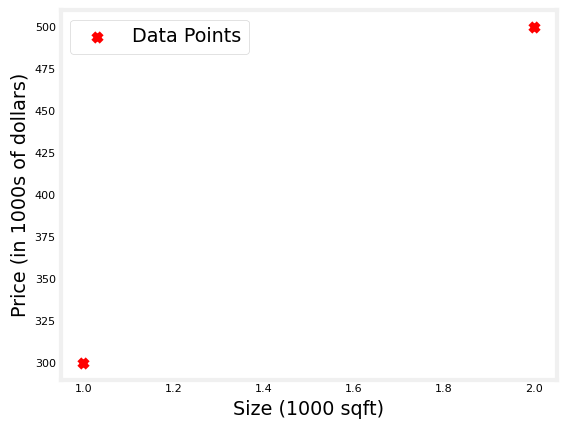

In [33]:
# DataSet
# We'll use an example from Course 1, linear regression on house prices.

X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [34]:
# Regression/Linear Model
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [35]:
linear_layer.get_weights()

[]

In [36]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.25949025]], shape=(1, 1), dtype=float32)


In [37]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.25949025]], b=[0.]


In [38]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [39]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [40]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

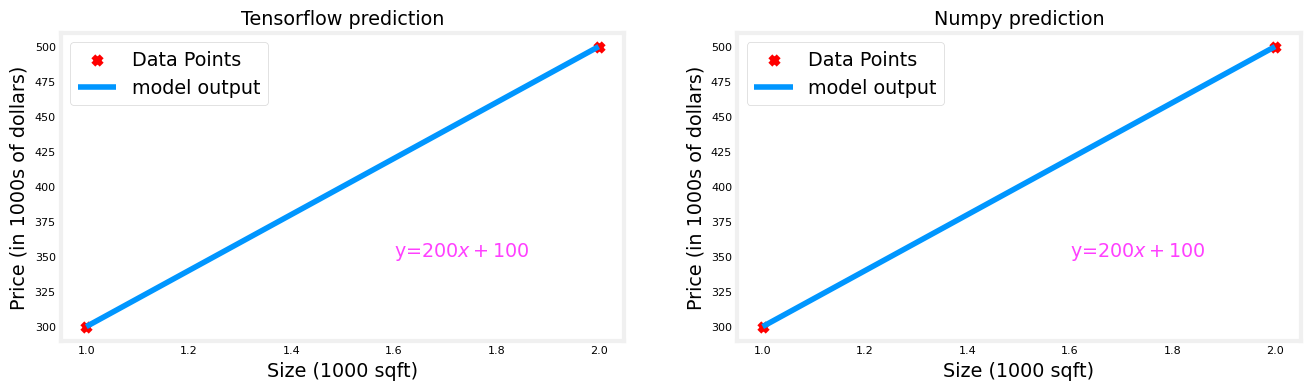

In [41]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [42]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

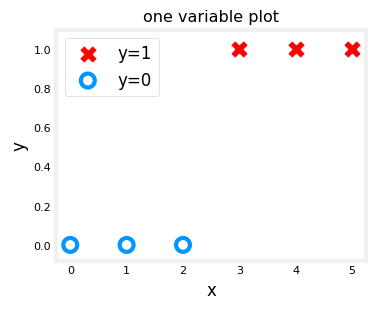

In [43]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [44]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[1.5198098]] [0.]
(1, 1) (1,)


In [47]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [48]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.01098694]]
[[0.01098694]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

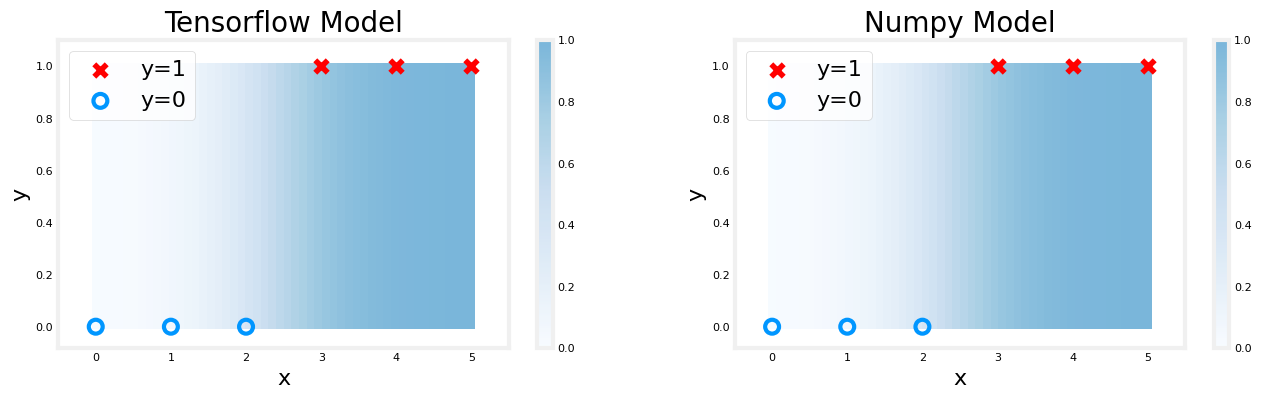

In [49]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

Yay!